In [1]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset as ncfile
from matplotlib.ticker import MultipleLocator
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
month=9 # 1 = January, 2 = February. 9 = September

MY_PATH = '/content/drive/MyDrive/Colab Notebooks/'
nc = ncfile(MY_PATH+'ice_area_extent_LE_1920_2100_40_members.nc')
years=nc.variables['year'][:]
sepextent=nc.variables['NHextent_model'][:,month-1,:]

NSIDCnc = ncfile(MY_PATH+'ice_extent_NSIDC_1979_2015.nc')
NSIDCyears=NSIDCnc.variables['year'][:]
NSIDCsepextent=NSIDCnc.variables['NSIDC_ice_extent'][month-1,:]


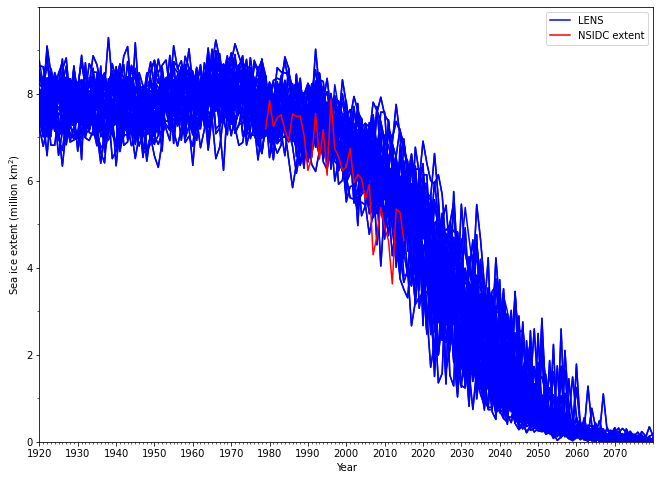

In [3]:
fig = plt.figure(figsize=(11, 8))
ax1 = fig.add_subplot(111)

ax1.axis([1920, 2080, 0, 10])
ax1.tick_params(direction='out', which='both')
ax1.tick_params(bottom='on')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sea ice extent (million km$^{2}$)')
ax1.set_xticks(np.arange(1920,2080,10))
for member in range(1, 39):
    ax1.plot(years, sepextent[member,:], color="blue")

ax1.set_yticks(np.arange(0, 10, 2))
ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.plot(years, sepextent[0,:], label='LENS', color="blue")
for member in range(1, 39):
    ax1.plot(years, sepextent[member,:], color="blue")

ax1.plot(NSIDCyears, NSIDCsepextent[:], label='NSIDC extent', color="red")

ax1.legend(loc='upper right')
